#Modeling and Visualization - Python Feature Engineering

###Chapter 1

In [ ]:
# Connect Google Drive to access Data

# from google.colab import drive
# drive.mount('/content/gdrive')

####Identifying Numerical and Categorical Variables

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
titanicData = pd.read_csv('gdrive/My Drive/Colab Notebooks/Modeling and Visualization/Data/titanic.csv')

titanicData.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


sibsp - discrete

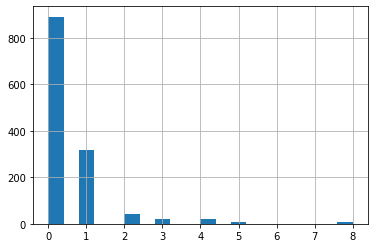

In [ ]:
titanicData['sibsp'].hist(bins=20)

fare - continuous

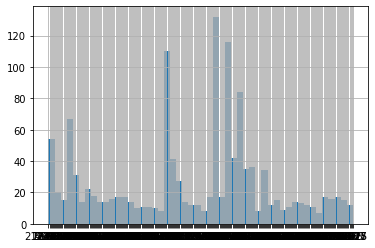

In [ ]:
titanicData['fare'].hist(bins=50)

####Quantifying Missing Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
cols = ['AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'MBCRAFT',
'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML','MAGFEM', 'MAGMALE']

cupData = pd.read_csv('gdrive/My Drive/Colab Notebooks/Modeling and Visualization/Data/cup98LRN.txt', usecols = cols)
cupData.head()

,AGE,NUMCHLD,INCOME,WEALTH1,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE
0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46.0,1.0,6.0,9.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0
2,NaN,NaN,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,70.0,NaN,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78.0,1.0,3.0,2.0,1.0,0.0,9.0,0.0,4.0,1.0,0.0


In [ ]:
cupData.isnull().sum()

AGE         23665
NUMCHLD     83026
INCOME      21286
WEALTH1     44732
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
dtype: int64

In [ ]:
cupData.isnull().mean()

AGE         0.248030
NUMCHLD     0.870184
INCOME      0.223096
WEALTH1     0.468830
MBCRAFT     0.553955
MBGARDEN    0.553955
MBBOOKS     0.553955
MBCOLECT    0.554584
MAGFAML     0.553955
MAGFEM      0.553955
MAGMALE     0.553955
dtype: float64

Text(0.5, 1.0, 'Quantifying missing data')

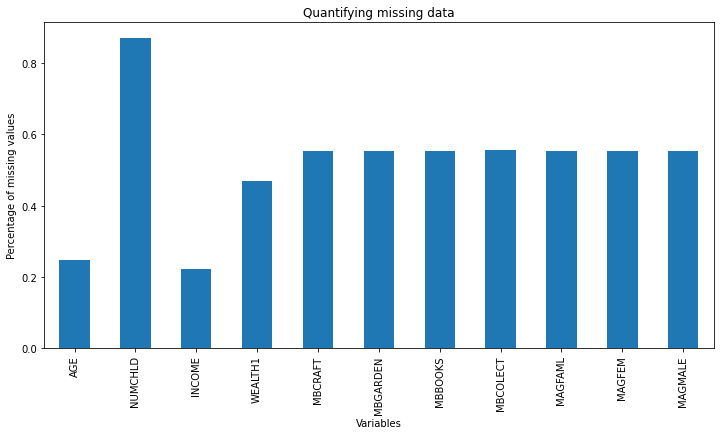

In [ ]:
cupData.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

####Determining Cardinality in Categorical Variables

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
cols = ['GENDER', 'RFA_2', 'MDMAUD_A', 'RFA_2', 'DOMAIN', 'RFA_15']
cupData = pd.read_csv('gdrive/My Drive/Colab Notebooks/Modeling and Visualization/Data/cup98LRN.txt', usecols=cols)
cupData = cupData.replace(' ', np.nan)
cupData.head()

,DOMAIN,GENDER,RFA_2,RFA_15,MDMAUD_A
0,T2,F,L4E,S4E,X
1,S1,M,L2G,NaN,X
2,R2,M,L4E,S4F,X
3,R2,F,L4E,S4E,X
4,S2,F,L2F,NaN,X


In [ ]:
cupData.nunique()

DOMAIN      16
GENDER       6
RFA_2       14
RFA_15      33
MDMAUD_A     5
dtype: int64

In [ ]:
cupData['GENDER'].unique()

array(['F', 'M', nan, 'C', 'U', 'J', 'A'], dtype=object)

Text(0.5, 1.0, 'Cardinality')

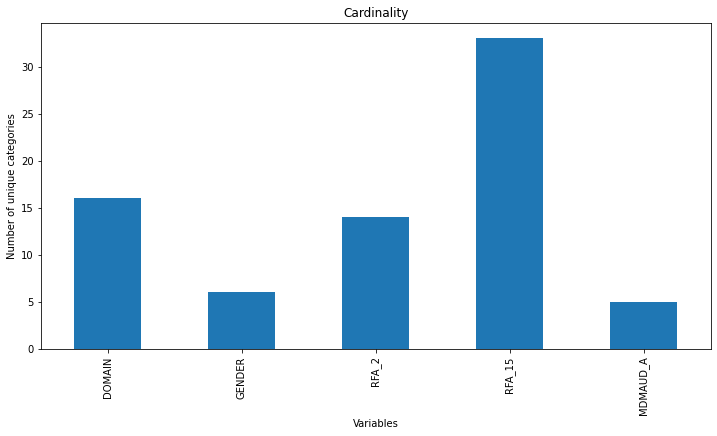

In [ ]:
cupData.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [ ]:
cupData[['RFA_2', 'MDMAUD_A', 'RFA_2']].nunique()

RFA_2       14
MDMAUD_A     5
RFA_2       14
dtype: int64

####Pinpointing Rare Categories in Categorical Variables

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
carData = pd.read_csv('gdrive/My Drive/Colab Notebooks/Modeling and Visualization/Data/car.data', header=None)
carData.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot',
'safety', 'class']
carData.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
carData['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [ ]:
label_freq = carData['class'].value_counts() / len(carData)
print(label_freq)

unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: class, dtype: float64


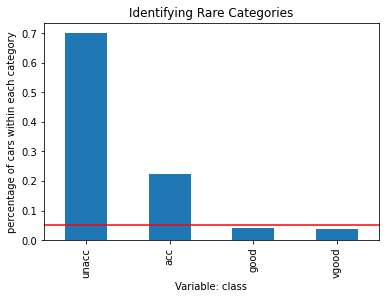

In [ ]:
fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05, color='red')
fig.set_ylabel('percentage of cars within each category')
fig.set_xlabel('Variable: class')
fig.set_title('Identifying Rare Categories')
plt.show()

####Identifying a Linear Relationship

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
np.random.seed(29)
x = np.random.randn(200)

y = x * 10 + np.random.randn(200) * 2

coordData = pd.DataFrame([x,y]).T
coordData.columns = ['x', 'y']

Text(0.5, 20.80000000000002, 'Independent variable')

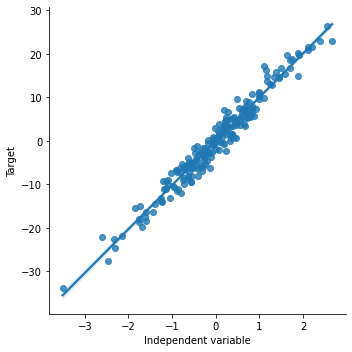

In [ ]:
sns.lmplot(x="x", y="y", data=coordData, order=1)
plt.ylabel('Target')
plt.xlabel('Independent variable')

In [ ]:
linreg = LinearRegression()
linreg.fit(coordData['x'].to_frame(), coordData['y'])

LinearRegression()

In [ ]:
pred = linreg.predict(coordData['x'].to_frame())
residuals = coordData['y'] - pred

Text(0.5, 0, 'Independent variable x')

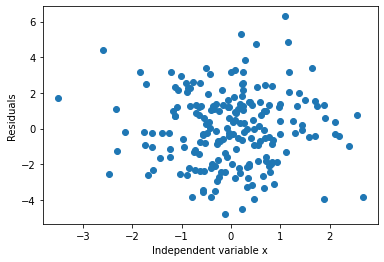

In [ ]:
plt.scatter(y=residuals, x=coordData['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

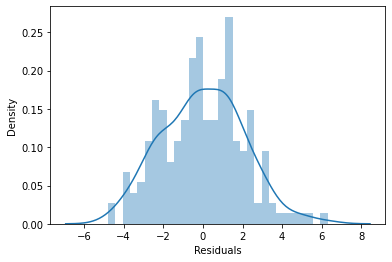

In [ ]:
sns.distplot(residuals, bins=30)
plt.xlabel('Residuals')

####Identifying a Normal Distribution

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
np.random.seed(29)
x = np.random.randn(200)

In [ ]:
normData = pd.DataFrame([x]).T
normData.columns = ['x']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


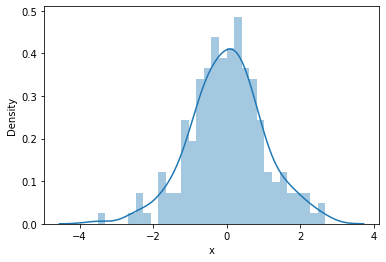

In [ ]:
sns.distplot(normData['x'], bins = 30)

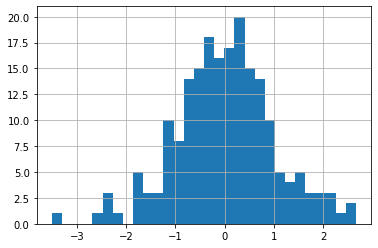

In [ ]:
normData['x'].hist(bins = 30)

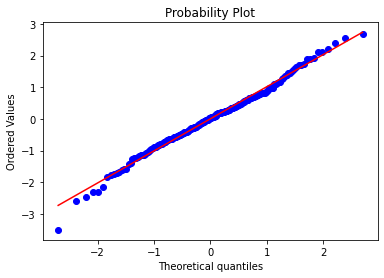

In [ ]:
stats.probplot(normData['x'], dist="norm", plot=plt)
plt.show()

####Distinguishing Variable Distribution

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

raw_df

ParserError: ignored

####Highlighting Outliers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

####Comparing Feature Magnitude